### Import modules

In [2]:
from bhc import bhclust

In [3]:
import cppimport
hh = cppimport.imp('helper')
from bhc_fast import bhclust_fast

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

### Toy data

In [48]:
mdat = np.array([[ 0.93637874,  1.61258974],
       [ 1.95192875,  2.84452075],
       [ 2.07671748,  3.24442548],
       [ 3.122903  ,  4.516753  ],
       [ 3.56202194,  5.17531994],
       [ 3.53211875,  5.75857675],
       [ 4.65794237,  6.66995537],
       [ 5.83738797,  8.46562797],
       [ 6.22595817,  9.28082817],
       [ 6.51552067,  9.36110867],
       [ 7.24619975,  3.68958775],
       [ 6.50554148,  3.69771048],
       [ 6.58213752,  4.31283952],
       [ 6.02279742,  4.52753342],
       [ 5.83280398,  4.85751598],
       [ 5.12305078,  4.76874878],
       [ 5.0430706 ,  5.2911986 ],
       [ 2.44081699,  6.35402999]])

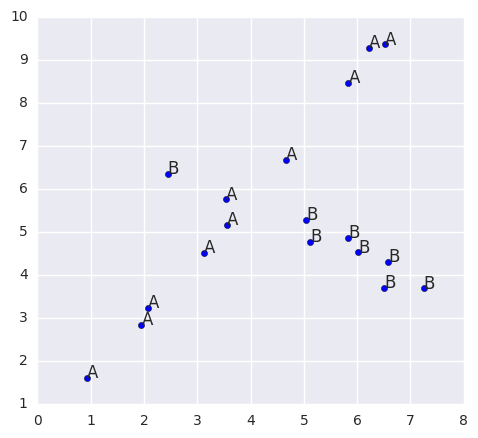

In [94]:
labm = ['A'] * 10 + ['B'] * 8
labcols = {'A': 'y', 'B':'g'}
plt.figure(figsize=(5.5,5))
plt.scatter(mdat[:,0], mdat[:,1])
for i in range(mdat.shape[0]):
    plt.annotate(labm[i], (mdat[i,0], mdat[i,1]))
plt.show()

In [7]:
%%timeit
Zm, colorm = bhclust(mdat, family = "multivariate", alpha = 1)

10 loops, best of 3: 37 ms per loop


In [8]:
%%timeit
Zm, colorm = bhclust_fast(mdat, family = "multivariate", alpha = 1)

100 loops, best of 3: 9.1 ms per loop


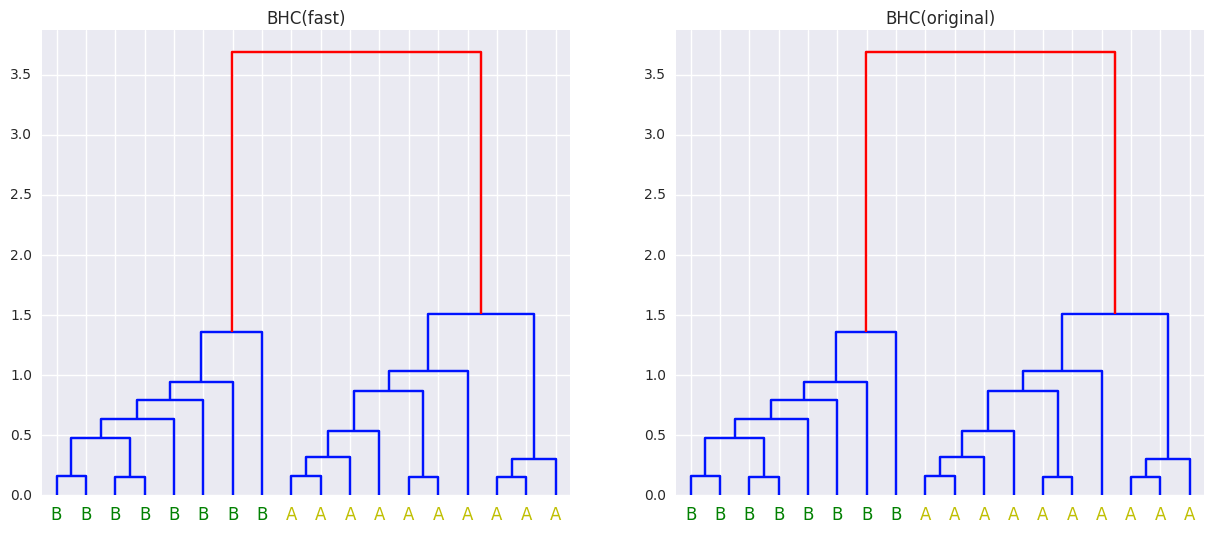

In [57]:
plt.figure(figsize=(15,6))

plt.subplot(121)
Zm, colorm = bhclust_fast(mdat, family = "multivariate", alpha = 1)
dendrogram(Zm, link_color_func=lambda k : colorm[k], labels = labm)
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for y in xlbls:
    y.set_color(labcols[y.get_text()])
plt.title("BHC(fast)")

plt.subplot(122)
Zm, colorm = bhclust(mdat, family = "multivariate", alpha = 1)
dendrogram(Zm, link_color_func=lambda k : colorm[k], labels = labm)
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for y in xlbls:
    y.set_color(labcols[y.get_text()])
plt.title("BHC(original)")

plt.show()

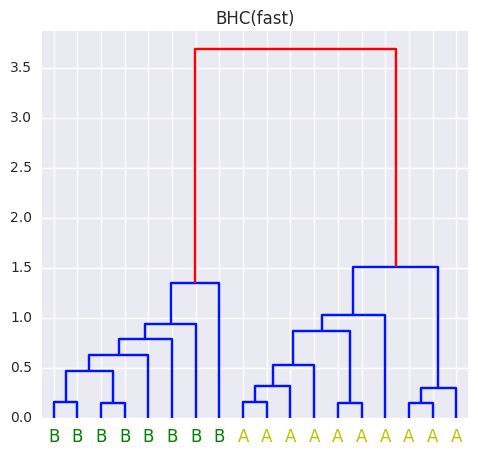

In [95]:
plt.figure(figsize=(5.5,5))
Zm, colorm = bhclust_fast(mdat, family = "multivariate", alpha = 1)
dendrogram(Zm, link_color_func=lambda k : colorm[k], labels = labm)
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for y in xlbls:
    y.set_color(labcols[y.get_text()])
plt.title("BHC(fast)")
plt.show()

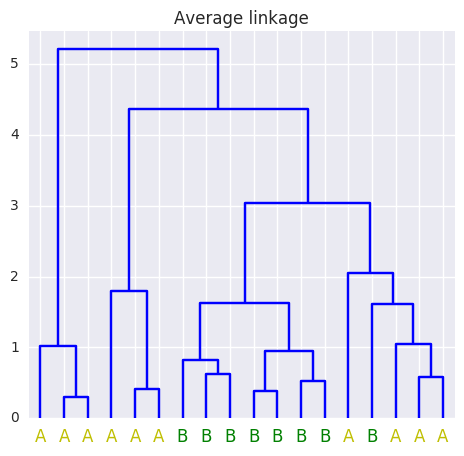

In [62]:
plt.figure(figsize=(5.5,5))
Zm3 = linkage(mdat, method='average')
dendrogram(Zm3, link_color_func=lambda k : 'b', labels = labm)
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for y in xlbls:
    y.set_color(labcols[y.get_text()])
plt.title("Average linkage")
plt.show()

### Spiral data

In [26]:
spi = np.genfromtxt('../tests/spiral.txt')
spi.shape

(312, 3)

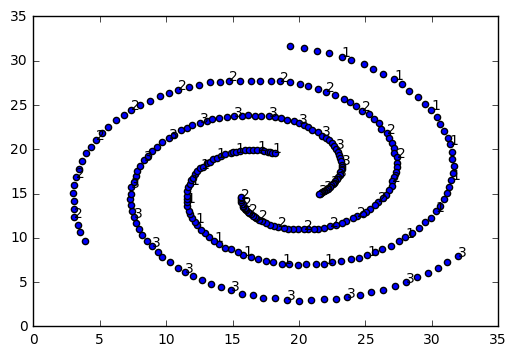

In [18]:
plt.scatter(spi[:,0], spi[:,1])
for i in range(spi.shape[0]):
    if i%5 == 0:
        plt.annotate(spi[i,2].astype('int'), (spi[i,0], spi[i,1]))
plt.show()

In [ ]:
### %%timeit
Zm, colorm = bhclust(mdat, family = "multivariate", alpha = 1)
Zm, colorm = bhclust_fast(mdat, family = "multivariate", alpha = 1)

In [47]:
%time Zs1, colors1 = bhclust_fast(spi[:,:2], family = "multivariate", alpha = 1, r = 0.1)

CPU times: user 6.69 s, sys: 68 ms, total: 6.76 s
Wall time: 5.51 s


In [ ]:
%time Zs2, colors2 = bhclust(spi[:,:2], family = "multivariate", alpha = 1, r = 0.1)

/home/jovyan/work/bhc/bhc/bhc.py:145: RuntimeWarning: divide by zero encountered in log
  return np.log(ml)
/home/jovyan/work/bhc/bhc/bhc.py:67: RuntimeWarning: invalid value encountered in double_scalars
  x0.append(x[idx]); d0.append(d[idx]); ml.append(lp1[idx] + log(1+exp(lp2[idx] - lp1[idx])))


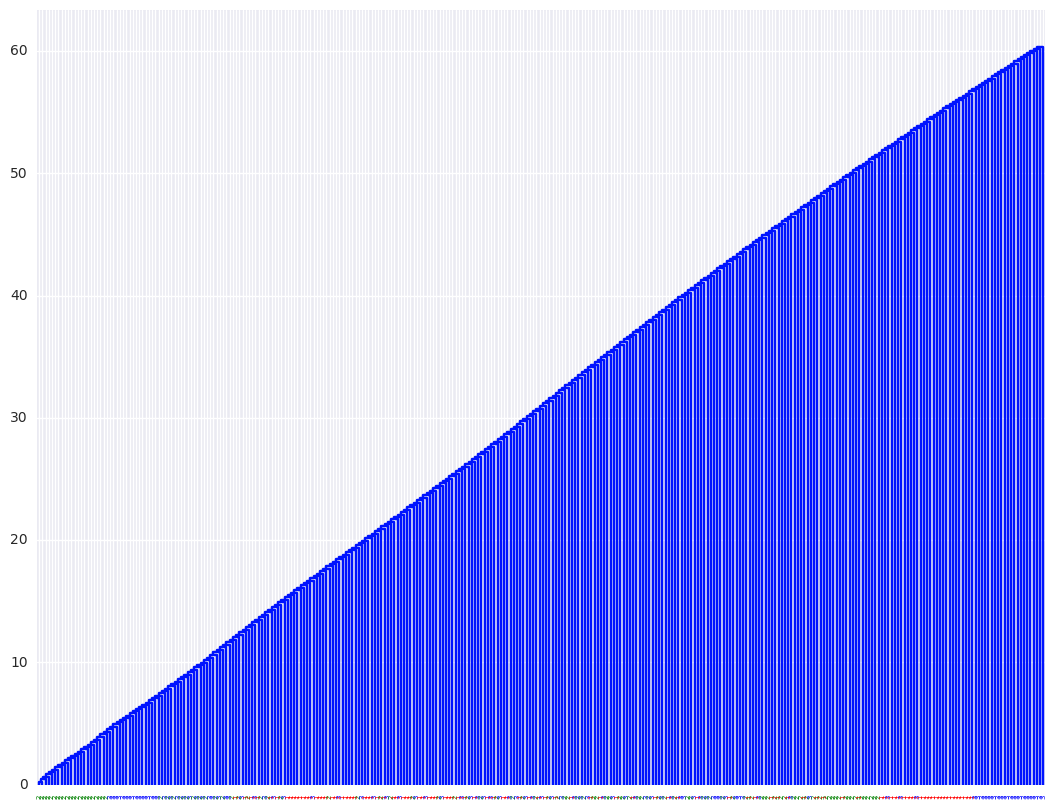

In [20]:
labss = dd[:,2].astype('int').tolist()
labcolss = {'1': 'r', '2':'g', '3':'b'}


plt.figure(figsize=(15,15))

plt.subplot(211)
dendrogram(Zs1, link_color_func=lambda k : colors1[k], labels = labss)
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for y in xlbls:
    y.set_color(labcolss[y.get_text()])
plt.title("fast")

plt.subplot(212)
dendrogram(Zs2, link_color_func=lambda k : colors2[k], labels = labss)
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for y in xlbls:
    y.set_color(labcolss[y.get_text()])
plt.title("original")

plt.show()

### Aggregation data

In [39]:
ag = np.genfromtxt('../tests/aggregation.txt')
ag.shape

(788, 3)

In [12]:
# labels
import seaborn as sns
laba = ag[:,2].astype('int').tolist()
labcola = {}
for i in range(7):
    labcola["%d"%(i+1)] = sns.color_palette("Paired", 7)[i]
    
cs = [labcola["%d"%(i)] for i in laba]

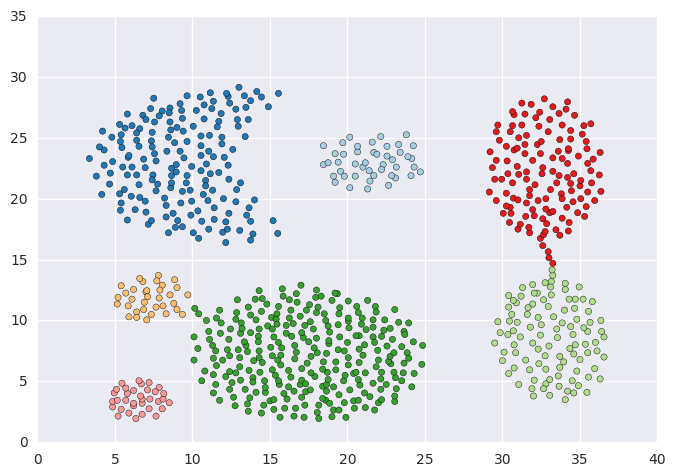

In [13]:
plt.scatter(ag[:,0], ag[:,1], c = cs)
plt.show()

In [14]:
#%%timeit -n 1 -r 1
%time Za1, colora1 = bhclust_fast(ag[:,:2], family = "multivariate", alpha = 1, r = 0.001)

CPU times: user 53.8 s, sys: 1.02 s, total: 54.8 s
Wall time: 53.4 s


In [40]:
%time Za2, colora2 = bhclust(ag[:,:2], family = "multivariate", alpha = 1, r = 0.001)

/home/jovyan/work/bhc/bhc/bhc.py:145: RuntimeWarning: divide by zero encountered in log
  return np.log(ml)
/home/jovyan/work/bhc/bhc/bhc.py:140: RuntimeWarning: overflow encountered in double_scalars
  t5num = np.prod(gamma( (vprime - np.arange(k))/2 ) ) * (2 ** (vprime * k / 2))
/home/jovyan/work/bhc/bhc/bhc.py:143: RuntimeWarning: invalid value encountered in double_scalars
  ml = t1 * t2 * t3 * t4 * (t5num/t5den)


CPU times: user 12min 57s, sys: 21.6 s, total: 13min 19s
Wall time: 2min 30s


In [40]:
Za3 = linkage(ag[:,:2], method = "average")

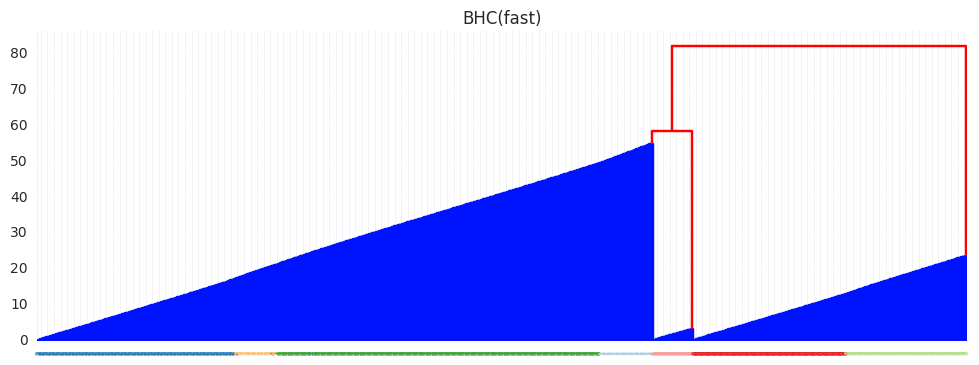

In [44]:
plt.figure(figsize=(12,4))
dendrogram(Za1, link_color_func=lambda k : colora1[k], labels = laba)
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for y in xlbls:
    y.set_color(labcola[y.get_text()])
plt.title("BHC(fast)")
plt.show()
pass

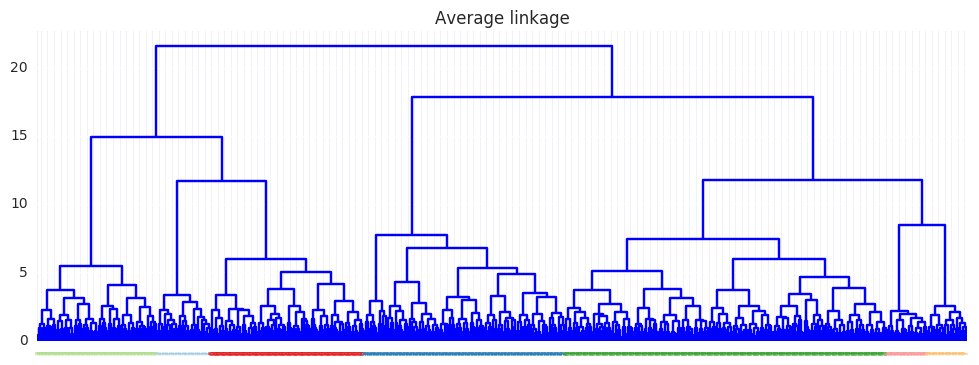

In [41]:
plt.figure(figsize=(12,4))
dendrogram(Za3, link_color_func=lambda k : 'b', labels = laba)
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for y in xlbls:
    y.set_color(labcola[y.get_text()])
plt.title("Average linkage")
plt.show()

### Cedar data

In [63]:
ce = np.genfromtxt('../tests/cedar.csv', delimiter = ',')
ce.shape

(120, 64)

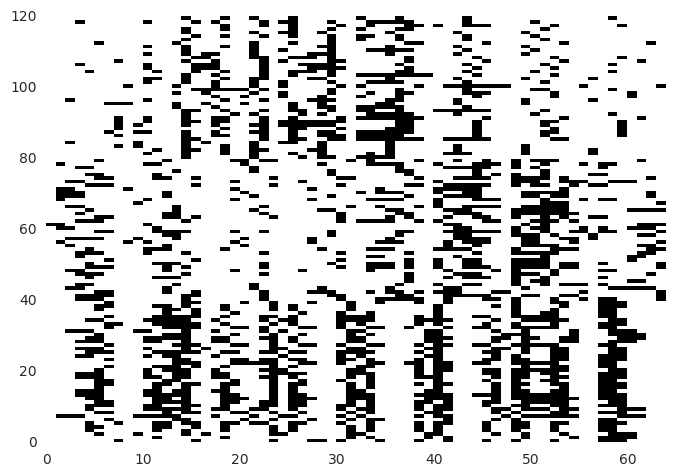

In [93]:
plt.pcolor(ce)
plt.xlim(0,64)
plt.show()

In [75]:
labc = ['00000'] * 40 + ['22222'] * 40 + ['44444'] * 40
labcolc = {'00000': 'y', '22222':'g', '44444':'k'}

In [78]:
%timeit Zc, colorc = bhclust_fast(ce[:,:7], family = "bernoulli", alpha = 0.001)

1 loop, best of 3: 893 ms per loop


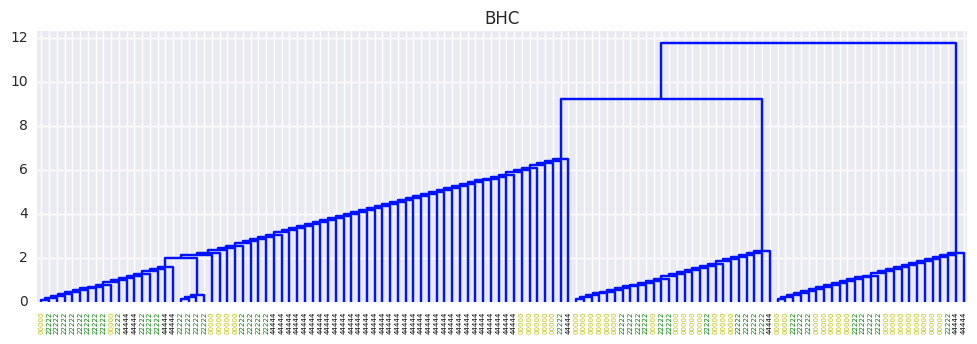

In [87]:
plt.figure(figsize=(12,3.5))
dendrogram(Zc, link_color_func=lambda k : colorc[k], labels = labc)
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for y in xlbls:
    y.set_color(labcolc[y.get_text()])
plt.title("BHC")

plt.show()

In [80]:
Zc3 = linkage(ce, method = 'average')

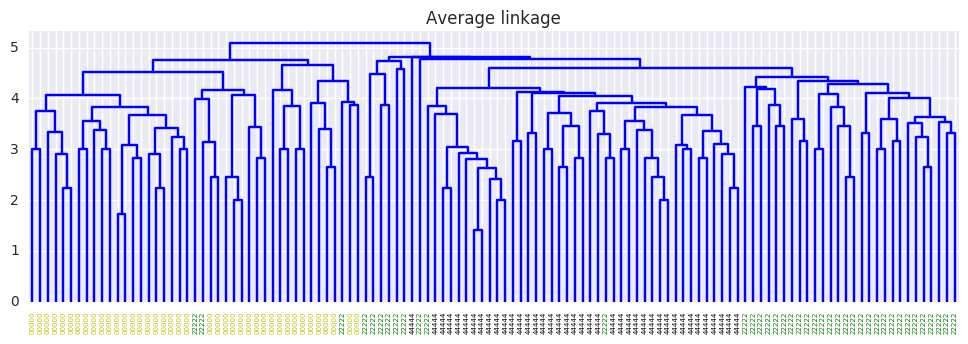

In [88]:
plt.figure(figsize=(12,3.5))
dendrogram(Zc3, link_color_func=lambda k : 'b', labels = labc)
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for y in xlbls:
    y.set_color(labcolc[y.get_text()])
plt.title("Average linkage")
plt.show()
pass

### Seeds data

In [15]:
sd = np.genfromtxt('../tests/seeds.txt')
sd.shape

(210, 8)

In [16]:
labd = ['Kama']*70+ ['Rosa']*70 + ['Canadian'] * 70
labcold = {}
for i,j in enumerate(['Kama','Rosa', 'Canadian']):
    labcold[j] = sns.color_palette("Paired", 3)[i]

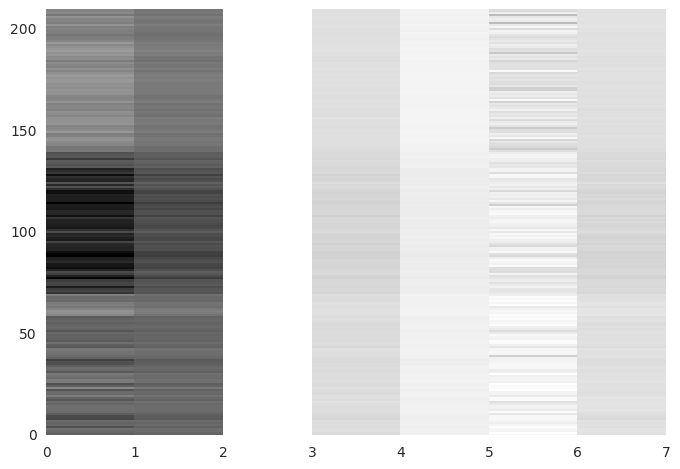

In [37]:
plt.pcolor(sd[:,:7])
plt.ylim(0,210)
plt.show()

In [28]:
%time Zd1, colord1 = bhclust_fast(sd[:,:7], family = "multivariate", alpha = 1)

CPU times: user 3.64 s, sys: 160 ms, total: 3.8 s
Wall time: 2.4 s


In [ ]:
%time Zd2, colord2 = bhclust(sd[:,:7], family = "multivariate", alpha = 1)

/home/jovyan/work/bhc/bhc/bhc.py:140: RuntimeWarning: overflow encountered in double_scalars
  t5num = np.prod(gamma( (vprime - np.arange(k))/2 ) ) * (2 ** (vprime * k / 2))
/home/jovyan/work/bhc/bhc/bhc.py:82: RuntimeWarning: invalid value encountered in double_scalars
  lodds.append(lp1[t] - lp2[t])
/home/jovyan/work/bhc/bhc/bhc.py:143: RuntimeWarning: invalid value encountered in double_scalars
  ml = t1 * t2 * t3 * t4 * (t5num/t5den)


In [26]:
Zd3 = linkage(sd[:,:7], method = "average")

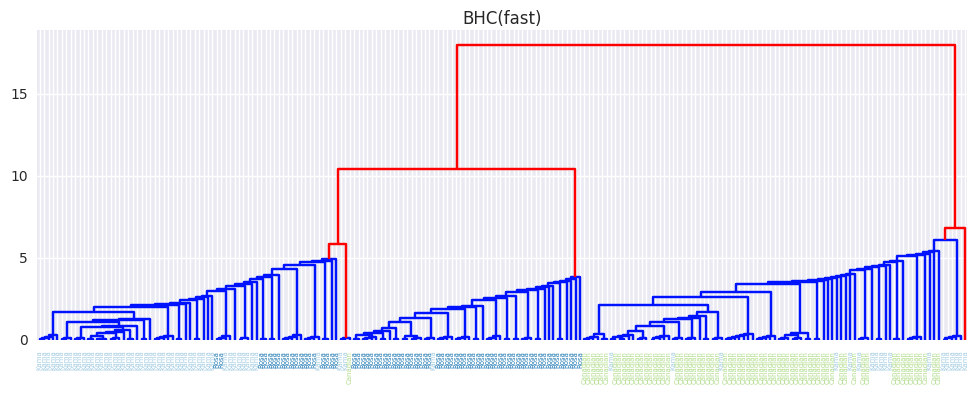

In [36]:
plt.figure(figsize=(12,4))
dendrogram(Zd1, link_color_func=lambda k : colord1[k], labels = labd)
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for y in xlbls:
    y.set_color(labcold[y.get_text()])
plt.title("BHC(fast)")
plt.show()

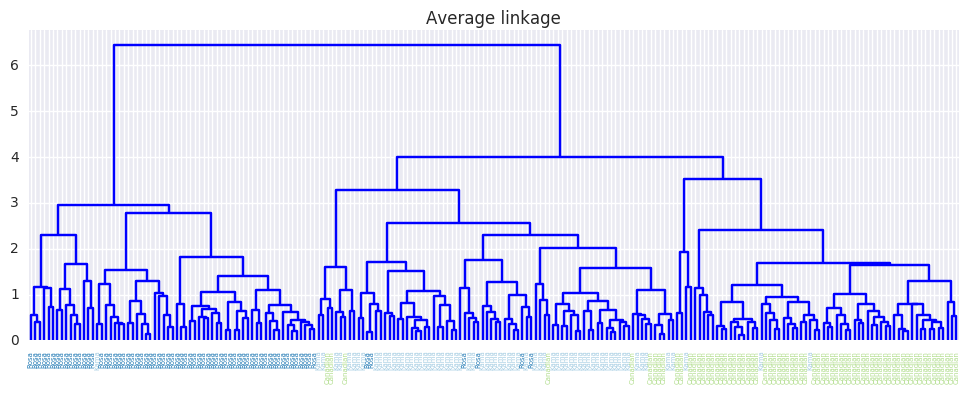

In [33]:
plt.figure(figsize=(12,4))
dendrogram(Zd3, link_color_func=lambda k : 'b', labels = labd)
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for y in xlbls:
    y.set_color(labcold[y.get_text()])
plt.title("Average linkage")
plt.show()
pass